In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# view all pandas columns
pd.set_option('display.max_columns', None)

In [2]:
# Login using e.g. `huggingface-cli login` to access this dataset
instbooks = pd.read_parquet("hf://datasets/institutional/institutional-books-1.0-metadata/data/train-00000-of-00001.parquet")

In [11]:
instbooks.head(5)

,barcode_src,title_src,author_src,date1_src,date2_src,date_types_src,page_count_src,token_count_o200k_base_gen,language_src,language_gen,language_distribution_gen,topic_or_subject_src,topic_or_subject_gen,topic_or_subject_score_gen,genre_or_form_src,general_note_src,ocr_score_src,ocr_score_gen,likely_duplicates_barcodes_gen,text_analysis_gen,identifiers_src,hathitrust_data_ext
0,32044000000018,Geology of Massachusetts and Rhode Island.,"Emerson, Benjamin Kendall",1917,None,Single known date/probable date,314,201834,eng,eng,"{'language': ['eng', 'sco', 'ina'], 'proportio...","Geology, Rocks, Sedimentary, Rocks, Igneous",SCIENCE,0.999743,None,Map on one folded leaf in pocket (plate 1).,94.0,98.0,None,{'text_by_page_src': {'tokenizability_score': ...,"{'lccn': ['gs 17000364'], 'isbn': [], 'ocolc':...",{'url': 'https://hdl.handle.net/2027/hvd.32044...
1,32044000028530,A history of Japanese mathematics,"Smith, David Eugene",1914,None,Single known date/probable date,304,126171,eng,eng,"{'language': ['eng', 'sco', 'cof', 'cmn'], 'pr...","Mathematics, Japanese",SCIENCE,0.999735,None,,94.0,94.0,None,{'text_by_page_src': {'tokenizability_score': ...,"{'lccn': ['14003156 //r86'], 'isbn': [], 'ocol...",{'url': 'https://hdl.handle.net/2027/hvd.32044...
2,32044000028563,Rara arithmetica : a catalogue of the arithmet...,"Smith, David Eugene",1908,None,Single known date/probable date,562,269698,eng,eng,"{'language': ['eng', 'lat', 'deu', 'ita', 'ina...","Incunabula, Arithmetic",SCIENCE,0.998972,"Bibliographies, Early works",George A. Plimpton's collection is now in Colu...,87.0,78.0,None,{'text_by_page_src': {'tokenizability_score': ...,"{'lccn': ['08016565//r39'], 'isbn': [], 'ocolc...",{'url': 'https://hdl.handle.net/2027/hvd.32044...
3,32044000028571,Riemannsche Flächen,"Klein, Felix",1906,1892,Reprint/reissue date (Date 1) and original dat...,608,197065,deu,deu,"{'language': ['deu'], 'proportion': [99.691527...",Riemann surfaces,SCIENCE,0.998136,None,Reprint. Originally published: Neuer unver. Ab...,80.0,86.0,None,{'text_by_page_src': {'tokenizability_score': ...,"{'lccn': [], 'isbn': [], 'ocolc': ['(OCoLC)131...",{'url': 'https://hdl.handle.net/2027/hvd.32044...
4,32044000028613,L.A. Sohncke's Sammlung von Aufgaben aus der D...,"Sohncke, L. A.",1885,None,Single known date/probable date,270,134816,deu,deu,"{'language': ['deu', 'ztu', 'glv', 'bcl', 'hea...","Differential calculus, Calculus, Integral",SCIENCE,0.994572,None,Each vol. has also special t.-p.,88.0,67.0,None,{'text_by_page_src': {'tokenizability_score': ...,"{'lccn': ['14009235'], 'isbn': [], 'ocolc': ['...",{'url': 'https://hdl.handle.net/2027/hvd.32044...


<Axes: >

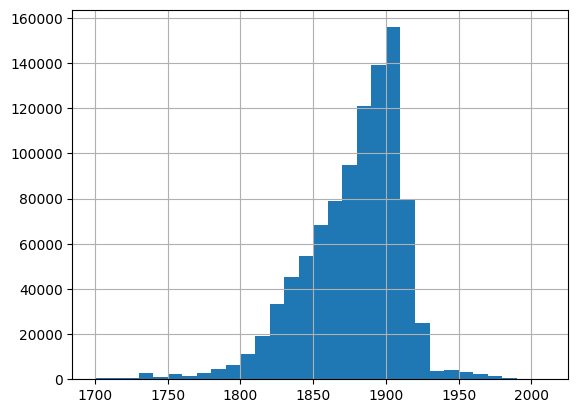

In [9]:
fig, ax = plt.subplots()
for cat in categories:
    instbooks[instbooks["topic_or_subject_gen"]==cat]["date1_src"].str.extract(r'(\d+)', expand=False).astype(float).hist(bins=range(1700, 2020, 10))


In [13]:
# give me the counts of all categories in topic_or_subject_gen:
instbooks["topic_or_subject_gen"].value_counts()

topic_or_subject_gen
LANGUAGE AND LITERATURE                                                            251263
LAW                                                                                133335
PHILOSOPHY. PSYCHOLOGY. RELIGION                                                   122568
SCIENCE                                                                            118833
SOCIAL SCIENCES                                                                     52977
AGRICULTURE                                                                         38280
AUXILIARY SCIENCES OF HISTORY                                                       36006
MEDICINE                                                                            34340
HISTORY OF THE AMERICAS                                                             28758
POLITICAL SCIENCE                                                                   28719
GEOGRAPHY. ANTHROPOLOGY. RECREATION                                            

In [15]:
instbooks["topic_or_subject_gen"].unique()

array(['SCIENCE', 'SOCIAL SCIENCES', 'AGRICULTURE', 'TECHNOLOGY',
       'LANGUAGE AND LITERATURE', 'HISTORY OF THE AMERICAS', 'MEDICINE',
       'AUXILIARY SCIENCES OF HISTORY', 'FINE ARTS',
       'PHILOSOPHY. PSYCHOLOGY. RELIGION', 'EDUCATION',
       'POLITICAL SCIENCE', 'GENERAL WORKS',
       'WORLD HISTORY AND HISTORY OF EUROPE, ASIA, AFRICA, AUSTRALIA, NEW ZEALAND, ETC.',
       'LAW', 'GEOGRAPHY. ANTHROPOLOGY. RECREATION',
       'BIBLIOGRAPHY. LIBRARY SCIENCE. INFORMATION RESOURCES (GENERAL)',
       'MUSIC AND BOOKS ON MUSIC', 'NAVAL SCIENCE', 'MILITARY SCIENCE',
       None], dtype=object)

In [21]:
categories = ["SCIENCE", "SOCIAL SCIENCES", "LANGUAGE AND LITERATURE", "PHILOSOPHY. PSYCHOLOGY. RELIGION"]
# create a color palette in the length of categories
colors = sns.color_palette("hsv", len(categories))  # "hsv" is an option; you can choose others

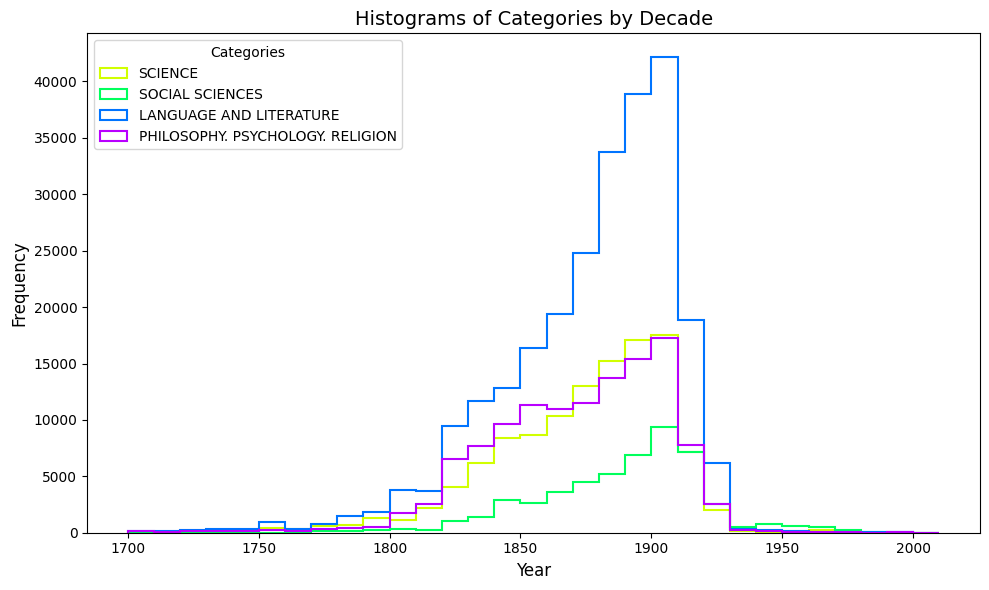

In [23]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through categories and plot histograms with corresponding colors
for cat, color in zip(categories, colors):
    # Extract the numerical values from the 'date1_src' column
    data = instbooks[instbooks["topic_or_subject_gen"] == cat]["date1_src"].str.extract(r'(\d+)', expand=False).astype(float)

    # Plot histogram outlines
    ax.hist(
        data.dropna(),  # Drop NaN values to avoid plotting errors
        bins=range(1700, 2020, 10),  # Decade ranges
        histtype='step',  # Transparent lines for the histogram
        color=color,  # Use the color palette
        linewidth=1.5,  # Thicker line for better visibility
        label=cat  # Add label for legend
    )


# Add labels, legend, and title
ax.set_title('Histograms of Categories by Decade', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(title="Categories", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
